<a href="https://colab.research.google.com/github/taeuk91/Tensorflow2/blob/main/TF_class_10_CNN_Hand_Writing_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

11501568/11490434 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


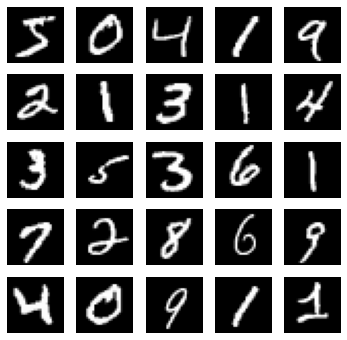

In [ ]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

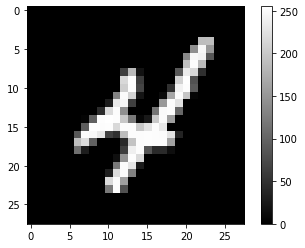

In [ ]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

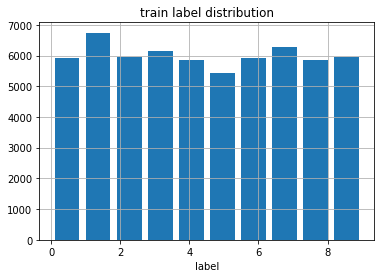

In [ ]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [ ]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


In [ ]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3183 - accuracy: 0.9089 - val_loss: 0.1998 - val_accuracy: 0.9408
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1473 - accuracy: 0.9568 - val_loss: 0.1379 - val_accuracy: 0.9598
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1017 - accuracy: 0.9696 - val_loss: 0.1220 - val_accuracy: 0.9650
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0773 - accuracy: 0.9772 - val_loss: 0.1090 - val_accuracy: 0.9678
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.1040 - val_accuracy: 0.9693
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.1064 - val_accuracy: 0.9689
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.1008 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1379 - accuracy: 0.9762


[0.13789471983909607, 0.9761999845504761]

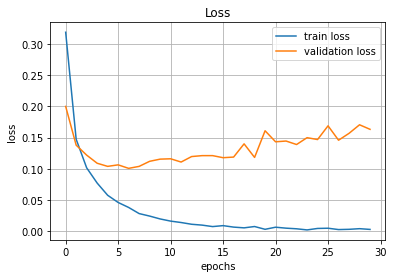

In [ ]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

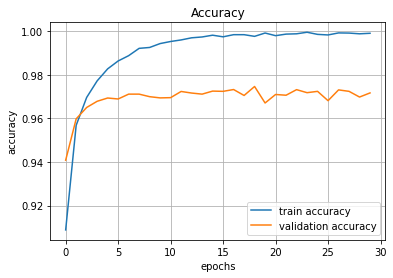

In [ ]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

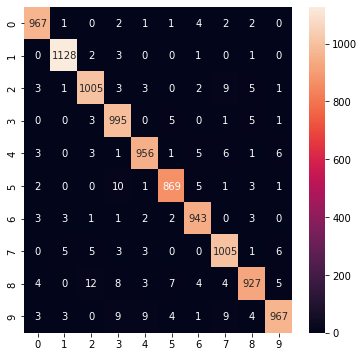

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[ 967    1    0    2    1    1    4    2    2    0]
 [   0 1128    2    3    0    0    1    0    1    0]
 [   3    1 1005    3    3    0    2    9    5    1]
 [   0    0    3  995    0    5    0    1    5    1]
 [   3    0    3    1  956    1    5    6    1    6]
 [   2    0    0   10    1  869    5    1    3    1]
 [   3    3    1    1    2    2  943    0    3    0]
 [   0    5    5    3    3    0    0 1005    1    6]
 [   4    0   12    8    3    7    4    4  927    5]
 [   3    3    0    9    9    4    1    9    4  967]]


label = 0	(967/980)	accuracy = 0.987
label = 1	(1128/1135)	accuracy = 0.994
label = 2	(1005/1032)	accuracy = 0.974
label = 3	(995/1010)	accuracy = 0.985
label = 4	(956/982)	accuracy = 0.974
label = 5	(869/892)	accuracy = 0.974
label = 6	(943/958)	accuracy = 0.984
label = 7	(1005/1028)	accuracy = 0.978
label = 8	(927/974)	accuracy = 0.952
label = 9	(967/1009)	accuracy = 0.958


In [ ]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[ 985. 1141. 1031. 1035.  978.  889.  965. 1037.  952.  987.]
